# Descriptive statistics and graphs about data using Pandas

In this chapter, we show how to use Pandas to calculate basic statistics of a dataset and show figures using automatically-generated graphs.

## What data are about

When you receive a new dataset (such as <a href="04-publications.csv">the one included in this chapter</a>), the first you have to do is to analyse it to understand what its data are about, how they have been organised, what is the type of each column, and whether there are any *null* object included in it (e.g. empty cells). In a previous tutorial, we have used an input parameter specified on the function `read_csv` (i.e. `keep_default_na` set to `False`) to rewrite empty cell values as empty strings (i.e. `""`). However, by doing so, we may miss some relevant information about the dataset that we should know from the beginning. Let us see it practically with an example, using the `DataFrame` [method `info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) that enables us to have a summary of the data frame:

In [ ]:
from pandas import read_csv

publications = read_csv("notebook/04-publications.csv", keep_default_na=False)
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doi                995 non-null    object
 1   title              995 non-null    object
 2   publication year   995 non-null    int64 
 3   publication venue  995 non-null    object
 4   type               995 non-null    object
 5   issue              995 non-null    object
 6   volume             995 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.5+ KB


As you can see from the text printed on screen, this seems a perfect dataset: 995 rows, entries organised in seven columns and each cell contains only non-null values. However, is it really the case? The problem here is that, by avoiding to use the default mechanism to assign empty cells, the systems does not recognize them as empty, but rather containing something (e.g. the empty string `""`) which indeed does not contain any charater but, still, is a value associated with a cell.

Thus, as a suggestion, when you approach for the very first time a dataset using Pandas, leave the system use its own favourite ways to handle situations (such as empty cells) and observe what this may mean. The following code show the same description reported above leaving the system to handle empty cells as it prefers:

In [ ]:
publications = read_csv("notebook/04-publications.csv")
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doi                995 non-null    object
 1   title              989 non-null    object
 2   publication year   995 non-null    int64 
 3   publication venue  981 non-null    object
 4   type               995 non-null    object
 5   issue              505 non-null    object
 6   volume             970 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.5+ KB


As you can see, now the description is slightly different. Indeed, the only columns having always a non-null value specified are `doi`, `publication year` and `type`, while the other columns have, somewhere, some cell left unspecified - which is reasonable, if you think about it. For instance, a book chapter does not have any issue or volume and, thus, the related cells must be empty in such a record.

After you got an idea of what kind of columns are included in the data frame, we can move on asking for more information about the values of each column. For retrieving this information, we use the [method `describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). If you want to obtain an overall view contained in a new data frame describing the one on which the method is called, the suggestion is to call such a method using the optional input named parameter `include` set to `"all"`, as shown in the following excerpt:

In [3]:
publications.describe(include="all")

,doi,title,publication year,publication venue,type,issue,volume
count,995,989,995.000000,981,995,505,970
unique,995,988,NaN,392,5,75,279
top,10.1002/cfg.304,Transformation toughening,NaN,Materials Science Forum,journal article,1,2006
freq,1,2,NaN,169,970,84,92
mean,NaN,NaN,1995.788945,NaN,NaN,NaN,NaN
std,NaN,NaN,18.224005,NaN,NaN,NaN,NaN
min,NaN,NaN,1886.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1993.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2006.000000,NaN,NaN,NaN,NaN


The data frame above provide a pletora of different [statistics](https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics) about each single column of the original data, some of them apply to a certain columns while other do not. For instance, all the statistics about number manipulations (`mean`, `std`, `min`, etc.) do not apply to strings, and thus a `NaN` is returned in these cases.

Some of these statistics are very useful, and allow you to understand something about the data without looking at all of them. For instance:

* there are two publications sharing the same title, that is "Transformation toughening";
* some of the publications (6) do not have a title associated;
* while all the publications have a type specified, overall these types come from 5 distinct values only (they seem to highlight descriptive categories);
* the oldest publication was published in 1886 while the newest in 2012.

Looking at these information, one could be curious about how can exist two publications with the same title. To get more information about it, we can run a query catching all the publications having in common the title "Transformation toughening":

In [4]:
publications.query('title == "Transformation toughening"')

,doi,title,publication year,publication venue,type,issue,volume
731,10.1007/bf00809059,Transformation toughening,1982,Journal of Materials Science,journal article,1,17
732,10.1007/bf00809057,Transformation toughening,1982,Journal of Materials Science,journal article,1,17


Indeed, these two publications may seem the same one, since they share all the other data, except the DOI. Thus, one possibility would be to use the DOI resolver (https://doi.org) to see to which kind of entities these DOIs (i.e. https://doi.org/10.1007/bf00809059 and https://doi.org/10.1007/bf00809057) actually refer to. Once seen them, are they the same entity? Hint: look at the subtitle and the number of the pages...

In addition to the statistics provided in the previous data frame, other statistics can be calculated using the data in the columns of the data frame. For instance, another important statistics for numeric values is the [median](https://en.wikipedia.org/wiki/Median):

In [5]:
print("-- Median value of the publication years in the data")
print(publications["publication year"].median())

-- Median value of the publication years in the data
2003.0


The `Series` [method `median`](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)  calculates such an important statistics that enables one to identify the average value of a series of numbers partially-limitating the effect of the [outliers](https://en.wikipedia.org/wiki/Outlier) in the series. Indeed, the average calculated in the data frame above is lower than the median, since it is affected by some very low publication dates (e.g. 1886), which do not affect at all the median instead. 

Another useful operation one can run on series is provided by the [method `unique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html). This method is useful to identify what are all the unique values in a series that, in principle, can contain several items. For instance, that can be used to identify the categories in the column `type`:

In [6]:
print("-- Categories describing types of publications")
publications["type"].unique()

-- Categories describing types of publications


array(['journal article', 'book', 'proceedings article', 'book chapter',
       'monograph'], dtype=object)

## Drawing data

In addition to generate data frames with descriptive statistics, Pandas makes available also methods to [draw data](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) in simple graphs, such as line charts, bar charts, etc. For instance, taking as example the types of publications described in the previous code, we could be interested in understanding how many publications of each type are included in the data. For doing so, we first have to retrieve such number for each type using the `Series` [method `value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html), shown as follows:

In [7]:
type_count = publications["type"].value_counts()
type_count

type
journal article        970
book                    11
book chapter            11
proceedings article      2
monograph                1
Name: count, dtype: int64

The method `value_counts` applied to a series of strings returns the number of times each string appears in the series, where the unique strings of the series become the index of the new series. These kinds of series can be plotted as a bar chart easily, where the index labels are the categories shown in the x-axis, while the number of times each string is represented in the original series is the value highlighte in the y-axis. This diagram is plotted using the [method `plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), specifying the optional input named parameter `kind` set to `"bar"`, as shown as follows:

<Axes: xlabel='type'>

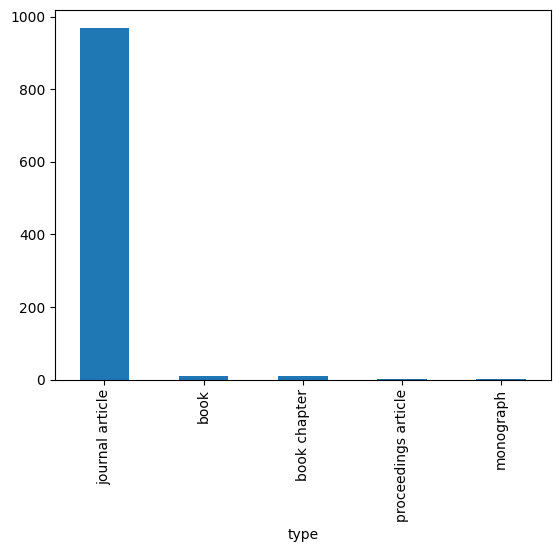

In [8]:
type_count.plot(kind="bar")

We can use a similar approach to understand, for instance, what are the top ten venues considering all the publication in the dataset. In this case, we use again the method `value_counts` and then we select the first 10 rows, as shown as follows:

In [9]:
best_venues = publications["publication venue"].value_counts()[:10]
best_venues

publication venue
Materials Science Forum                                           169
Key Engineering Materials                                          98
International Journal of Mathematics and Mathematical Sciences     34
Mediators of Inflammation                                          15
Applied Physics Letters                                            14
Journal of Applied Mathematics and Stochastic Analysis             14
Journal of the American Ceramic Society                            14
Physical Review Letters                                            10
Mathematical Problems in Engineering                               10
Journal of Applied Mathematics and Decision Sciences                9
Name: count, dtype: int64

Again, as before, we plot it as a *horizontal* bar chart using the same command shown in the previous example, but setting the parameter `kind` to `"barh"`:

<Axes: ylabel='publication venue'>

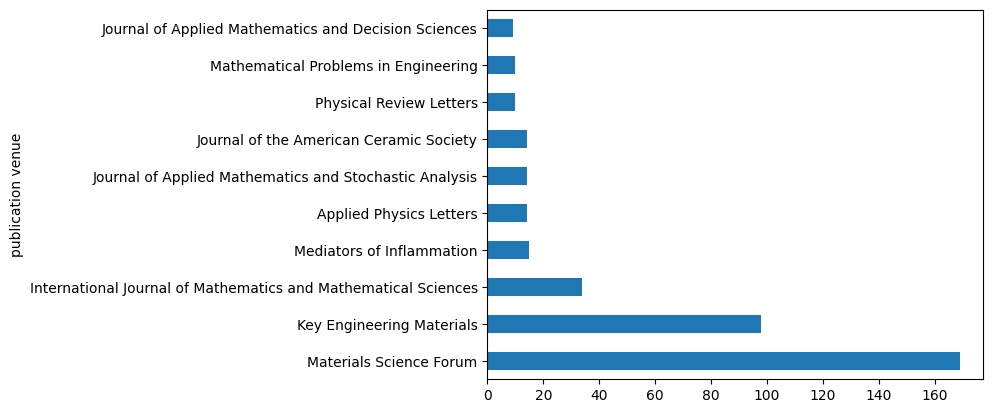

In [10]:
best_venues.plot(kind="barh")

We can use a different plot when we deal with *time* series, i.e. series of data that are organised temporally (for instance, year by year). For instance, we could be interested in understading how many publications have been published in each year. To retrieve this information, we can use again the method `value_counts`, but this time applied to the column `publication year`, as shown as follows:

In [11]:
publications_per_year = publications["publication year"].value_counts()
publications_per_year

publication year
2006    183
2007     92
2005     65
2008     56
2003     51
       ... 
2012      1
1917      1
1886      1
1955      1
1952      1
Name: count, Length: 85, dtype: int64

As you can see, the series contains the number of publications year by year, sorted in descending order, from the year with most publications to that with less publications. In order to draw all these data in the correct temporal order, we need first to sort them in ascending order using the index labels (i.e. the years of publication). For doing so, we can use the `Series` [method `sort_index`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html) to generate a new series ordered as mentioned:

In [12]:
publications_per_year_sorted = publications_per_year.sort_index()
publications_per_year_sorted

publication year
1886     1
1893     1
1894     2
1895     1
1902     1
        ..
2007    92
2008    56
2009    24
2011     7
2012     1
Name: count, Length: 85, dtype: int64

Then, finally, we can plot this new series using a simple line diagram (the default for the `plot` method) as shown as follows:

<Axes: xlabel='publication year'>

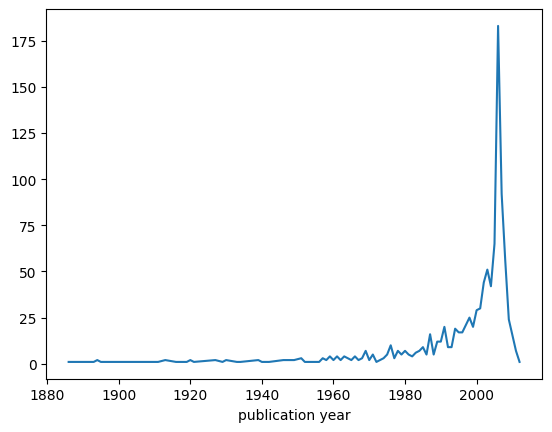

In [13]:
publications_per_year_sorted.plot()